In [137]:
# TensorFlow and tf.keras
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

import os
import cv2

import matplotlib.pyplot as plt

In [27]:
print tf.__version__

1.1.0


In [28]:
os.listdir("./data")

['.DS_Store',
 'sample_submission_I5njJSF.csv',
 'test_ScVgIM0',
 'test_ScVgIM0.zip',
 'train_LbELtWX',
 'train_LbELtWX.zip']

In [29]:
os.listdir("./data/train_LbELtWX")

['.DS_Store', 'train', 'train.csv']

In [49]:
os.listdir("./data/test_ScVgIM0")

['.DS_Store', 'test', 'test.csv']

In [30]:
# os.listdir("./data/train_LbELtWX/train/")

In [50]:
train_base_path = "./data/train_LbELtWX/train/"
test_base_path = "./data/test_ScVgIM0/test/"

In [376]:
def get_image_path(base_path):
    img_files = [i for i in os.listdir(base_path)]
    return img_files

In [391]:
test_image_files = get_image_path(test_base_path)
print len(test_image_files)
test_image_files[:3]

10000


['60001.png', '60002.png', '60003.png']

In [378]:
train_image_files = get_image_path(train_base_path)
print len(train_image_files)
train_image_files[:3]

60000


['1.png', '10.png', '100.png']

In [379]:
len(train_image_files)

60000

In [380]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return img

In [381]:
def show_image(file_path):
    plt.imshow(read_image(file_path))

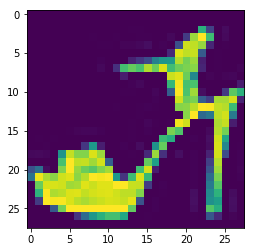

In [390]:
show_image(train_base_path + train_image_files[1])

In [236]:
# show_images(train_image_files[1])
# show_images(test_image_files[10])
# show_images(train_image_files[104])

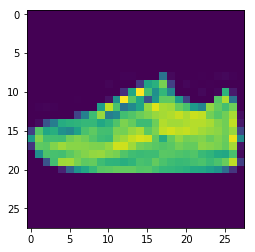

In [384]:
show_images(test_base_path + test_image_files[104])

In [385]:
id_label_dict[int("1.png".split(".")[0])]

9

In [375]:
int("1.png".split(".")[0])

1

In [369]:
train_image_files[0].split(".")[1].split("/")

['', 'data', 'train_LbELtWX', 'train', '1']

In [240]:
rows, cols = img.shape
print rows, cols

28 28


In [361]:
train_labels.head(3)

,id,label
0,1,9
1,2,0
2,3,0


In [417]:
def display_image(img, label):
    print "label: ", label
    plt.imshow(img)

In [364]:
id_label_dict = dict(zip(train_labels["id"], train_labels["label"]))

In [450]:
def get_image_data(image_files, base_path):
    labels = []
#     image_mat = np.zeros([len(image_files),rows, cols])  
    for idx in range(len(image_files)):
#         image_mat[idx] = read_image(base_path + image_files[idx])
        labels.append(id_label_dict[int(image_files[idx].split(".")[0])])
#     return image_mat, labels
    return labels

In [430]:
train_img, train_labels =  get_image_data(train_image_files, train_base_path)

In [451]:
train_labels =  get_image_data(train_image_files, train_base_path)

In [452]:
train_img.shape, len(train_labels)

((60000, 28, 28), 60000)

In [453]:
# train_image_files

In [409]:
label_dict = {
0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"
}

In [419]:
i =0

label:  Ankle boot


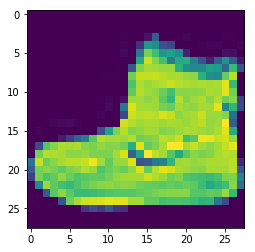

In [420]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sandal


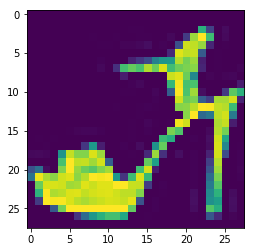

In [421]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


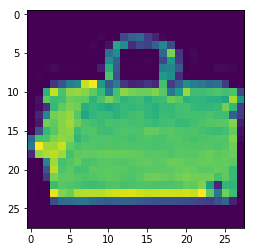

In [422]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


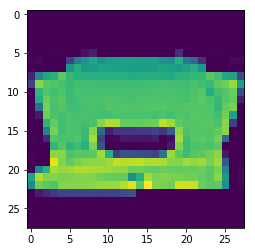

In [423]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Shirt


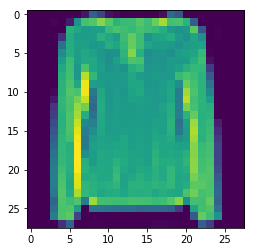

In [424]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


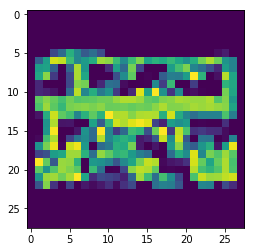

In [425]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sneaker


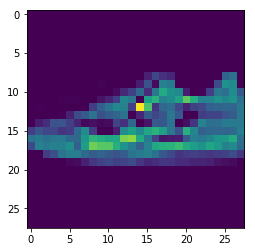

In [426]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Shirt


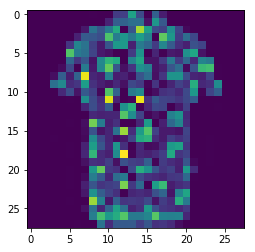

In [427]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Bag


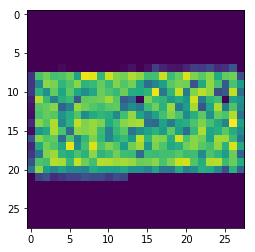

In [428]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

label:  Sneaker


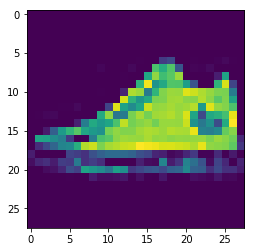

In [429]:
display_image(train_img[i], label_dict[train_labels[i]])
i = i+1

In [431]:
# test_img =  get_image_data(test_image_files[:50], test_base_path)

In [246]:
test_img.shape

(50, 28, 28)

In [247]:
train_img[0].shape

(28, 28)

In [290]:
train_labels = pd.read_csv("./data/train_LbELtWX/train.csv")

In [291]:
train_labels["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [447]:
len(train_labels)

60020

In [434]:
num_classes = 10
print num_classes

10


In [457]:
X_train = train_img
X_test = test_img

In [458]:
X_train = X_train.astype('float32')/225
X_test = X_test.astype('float32')/225

In [459]:
# train_labels["label"]

In [460]:
y_train = np_utils.to_categorical(train_labels)

In [461]:
y_train.shape

(60000, 10)

In [462]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

## Model

In [463]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import RMSprop
from keras.utils import np_utils

In [464]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes))

In [471]:
model = Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1568)              0         
__________

In [465]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               131200    
__________

In [472]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [473]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [474]:
# learning_rate_reduction = 

In [475]:
epochs = 10
batch_size = 64

In [476]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 112s 2ms/step - loss: 8.3718 - acc: 0.1298 - val_loss: 8.0228 - val_acc: 0.1003
Epoch 2/10
48000/48000 [==============================] - 103s 2ms/step - loss: 8.3094 - acc: 0.1049 - val_loss: 8.8529 - val_acc: 0.1003
Epoch 3/10
48000/48000 [==============================] - 105s 2ms/step - loss: 8.0220 - acc: 0.1120 - val_loss: 8.1195 - val_acc: 0.1003
Epoch 4/10
48000/48000 [==============================] - 104s 2ms/step - loss: 8.2208 - acc: 0.1174 - val_loss: 7.9986 - val_acc: 0.0988
Epoch 5/10
48000/48000 [==============================] - 104s 2ms/step - loss: 8.2095 - acc: 0.1115 - val_loss: 8.0899 - val_acc: 0.0987
Epoch 6/10
48000/48000 [==============================] - 103s 2ms/step - loss: 8.1559 - acc: 0.1140 - val_loss: 8.0282 - val_acc: 0.0988
Epoch 7/10
48000/48000 [==============================] - 105s 2ms/step - loss: 8.2684 - acc: 0.1146 - val_loss: 11.0919 -

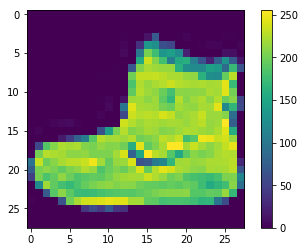

In [477]:
plt.figure()
plt.imshow(train_img[0])
plt.colorbar()
plt.gca().grid(False)


In [478]:
results = model.predict(X_test)

In [479]:
results = np.argmax(results,axis = 1)

In [480]:
results

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])

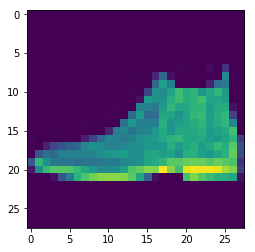

In [482]:
# display_image(test_base_path + test_image_files[0])
display_image(x)

In [336]:
train_labels[train_labels["label"]==4]["id"][:10]

19      20
22      23
24      25
28      29
29      30
68      69
75      76
76      77
96      97
117    118
Name: id, dtype: int64

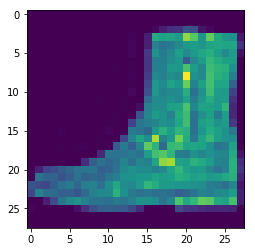

In [337]:
show_image(train_image_files[20])